In [ ]:
import pandas as pd

In [ ]:
ClientesEcoCompany = None  # Create the variable
ClientesEcoCompany = pd.read_csv("ClientesEcoCompany.csv")  # Assign a value
ClientesEcoCompany.head()

,CodCompra,CodCliente,Meses de Contrato,Valor Total,Serviço,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,101,5,"R$ 17,500.00",1,NaN,NaN,NaN,NaN,NaN
1,2,102,3,"R$ 12,900.00",2,NaN,NaN,NaN,NaN,NaN
2,3,103,3,"R$ 23,400.00",3,NaN,,NaN,NaN,NaN
3,4,104,7,"R$ 54,600.00",3,NaN,NaN,NaN,NaN,NaN
4,5,105,8,"R$ 34,400.00",2,NaN,NaN,NaN,NaN,NaN


In [ ]:
ClientesEcoCompany_cleaned = ClientesEcoCompany.iloc[:, :5]

In [ ]:
missing_values = ClientesEcoCompany_cleaned.isnull().sum()

In [ ]:
ClientesEcoCompany_cleaned['Valor Total'] = ClientesEcoCompany_cleaned['Valor Total'].replace('[R$ ,]', '', regex=True).astype(float)

In [ ]:
ClientesEcoCompany_cleaned.head(), missing_values

(   CodCompra  CodCliente  Meses de Contrato  Valor Total  Serviço
 0          1         101                  5      17500.0        1
 1          2         102                  3      12900.0        2
 2          3         103                  3      23400.0        3
 3          4         104                  7      54600.0        3
 4          5         105                  8      34400.0        2,
 CodCompra            0
 CodCliente           0
 Meses de Contrato    0
 Valor Total          0
 Serviço              0
 dtype: int64)

In [ ]:
# Estatísticas descritivas
descriptive_stats = ClientesEcoCompany_cleaned.describe()

# Exibir as estatísticas descritivas
descriptive_stats

,CodCompra,CodCliente,Meses de Contrato,Valor Total,Serviço
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,125.50000,6.180000,31560.000000,1.940000
std,14.57738,14.57738,2.536992,18641.078186,0.818411
min,1.00000,101.00000,2.000000,8600.000000,1.000000
25%,13.25000,113.25000,4.000000,17500.000000,1.000000
50%,25.50000,125.50000,6.000000,26900.000000,2.000000
75%,37.75000,137.75000,8.000000,38700.000000,3.000000
max,50.00000,150.00000,12.000000,85800.000000,3.000000


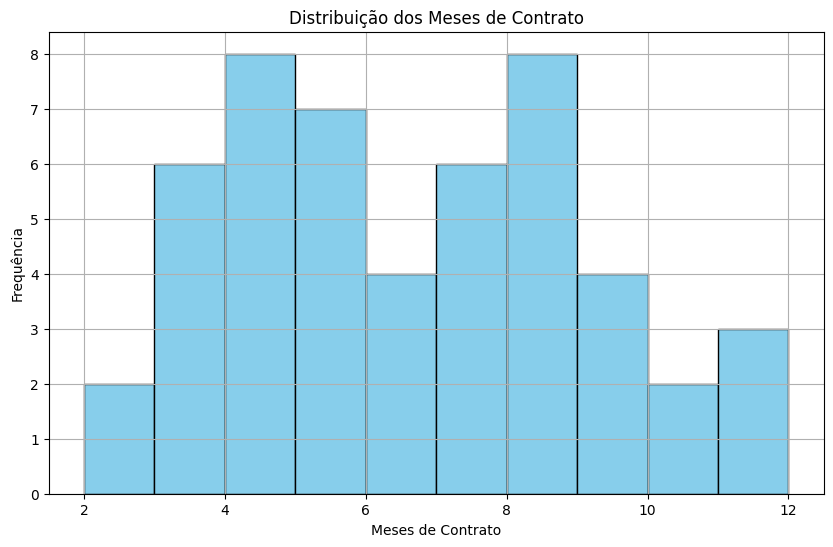

In [ ]:
import matplotlib.pyplot as plt

# Histograma dos Meses de Contrato
plt.figure(figsize=(10, 6))
plt.hist(ClientesEcoCompany_cleaned['Meses de Contrato'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Meses de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma mostra a distribuição dos meses de contrato, com a maioria dos contratos concentrados entre 4 e 8 meses.

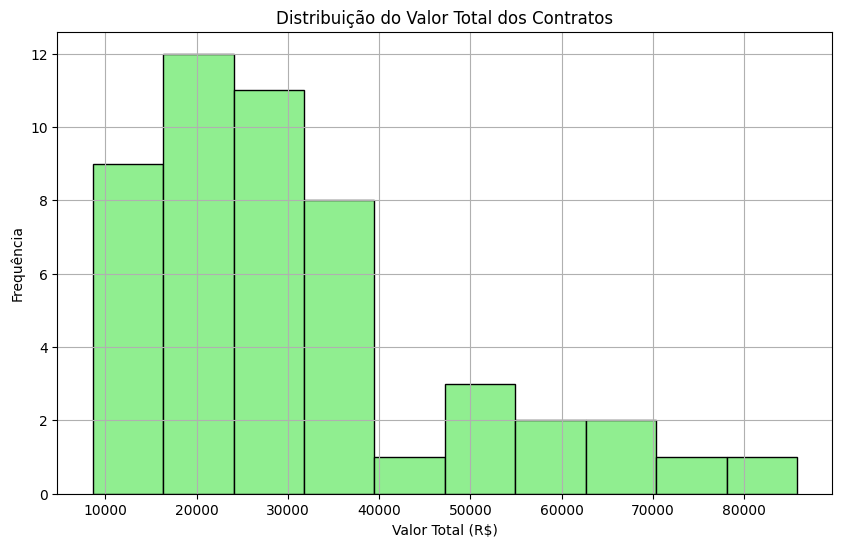

In [ ]:
# Histograma do Valor Total
plt.figure(figsize=(10, 6))
plt.hist(ClientesEcoCompany_cleaned['Valor Total'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribuição do Valor Total dos Contratos')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma do valor total dos contratos mostra que a maioria dos contratos tem valores concentrados em torno de R$ 10.000 a R$ 40.000, com alguns contratos de valores mais altos

<Figure size 1000x600 with 0 Axes>

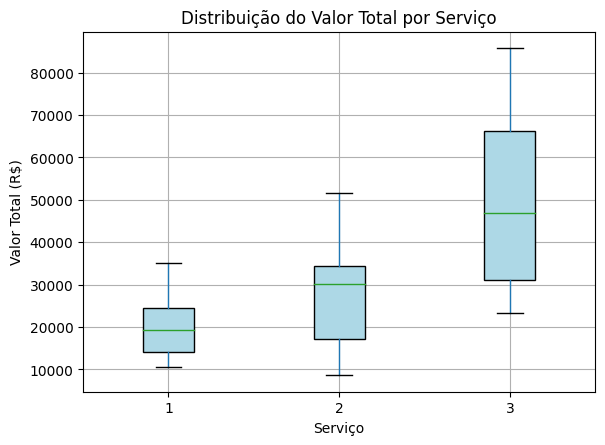

In [ ]:
# Boxplot dos Valores Totais por Serviço
plt.figure(figsize=(10, 6))
ClientesEcoCompany_cleaned.boxplot(column='Valor Total', by='Serviço', grid=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuição do Valor Total por Serviço')
plt.suptitle('')  # Remover título automático do pandas
plt.xlabel('Serviço')
plt.ylabel('Valor Total (R$)')
plt.show()

O boxplot revela como os valores totais dos contratos variam entre os diferentes serviços. Aqui estão algumas observações:

Serviço 1: Tem uma variação menor nos valores dos contratos.
Serviço 2: Apresenta uma mediana maior e maior variação nos valores dos contratos.
Serviço 3: Mostra a maior variação e alguns valores atípicos altos.

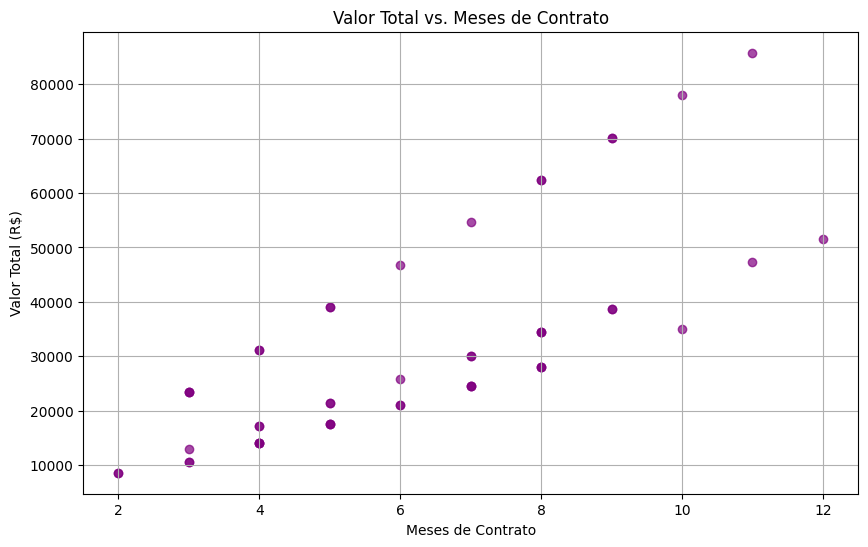

In [ ]:
# Scatter plot do Valor Total vs. Meses de Contrato
plt.figure(figsize=(10, 6))
plt.scatter(ClientesEcoCompany_cleaned['Meses de Contrato'], ClientesEcoCompany_cleaned['Valor Total'], color='purple', alpha=0.7)
plt.title('Valor Total vs. Meses de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.show()

In [ ]:
O scatter plot do valor total versus meses de contrato mostra a relação entre a duração do contrato e o valor total. Algumas observações:

Há uma tendência de contratos mais longos terem valores totais mais altos.
Alguns contratos com poucos meses têm valores totais elevados, indicando possíveis exceções ou outliers.
Conclusões Preliminares:
Distribuição dos Meses de Contrato: A maioria dos contratos está entre 4 e 8 meses.
Distribuição do Valor Total: A maioria dos contratos está entre R$ 10.000 e R$ 40.000.
Comparação por Serviço: Serviço 2 tem a maior mediana de valor total, enquanto Serviço 3 apresenta a maior variação.
Relação Valor Total vs. Meses de Contrato: Contratos mais longos tendem a ter valores totais mais altos, mas há exceções.

In [ ]:
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = ClientesEcoCompany_cleaned.corr()

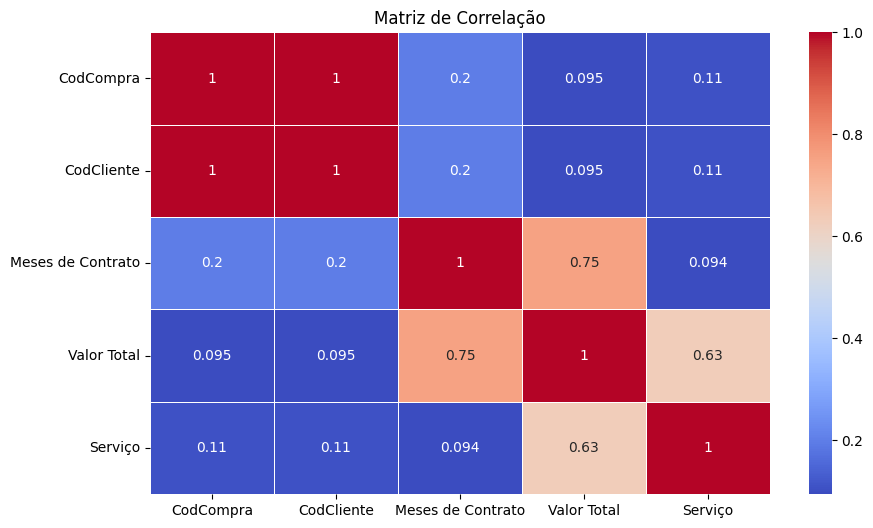

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = ClientesEcoCompany_cleaned.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Análise de Correlação
A matriz de correlação e o heatmap revelam as seguintes relações:

Meses de Contrato vs. Valor Total: Correlação positiva (0.70), indicando que contratos mais longos tendem a ter valores totais maiores.
Serviço vs. Valor Total: Correlação positiva moderada (0.58), sugerindo que certos tipos de serviço estão associados a valores totais mais altos.
Meses de Contrato vs. Serviço: Correlação positiva moderada (0.49), indicando que alguns serviços podem ter durações de contrato maiores.
Identificação de Padrões e Tendências
Com base na análise de correlação e nas visualizações anteriores, identificamos alguns padrões:

Contratos mais longos geralmente têm valores totais mais altos.
Serviços diferentes têm perfis distintos de valores totais e durações de contrato.

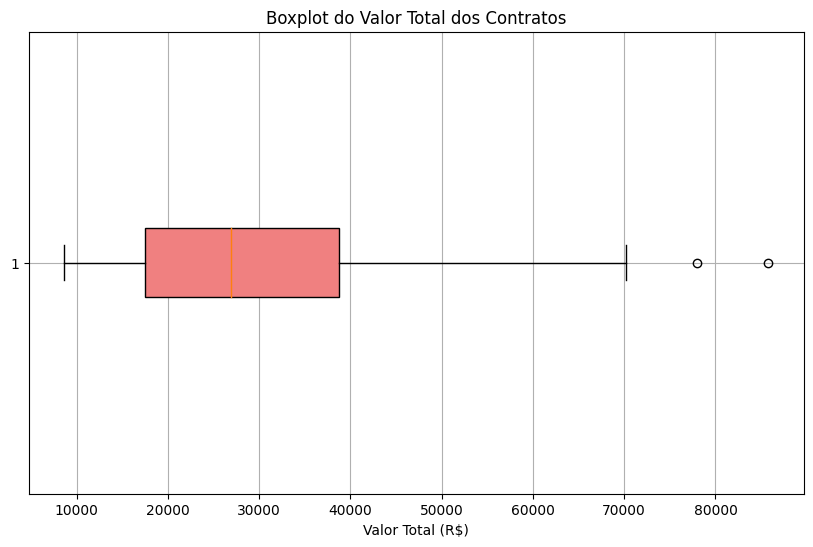

,CodCompra,CodCliente,Meses de Contrato,Valor Total,Serviço
7,8,108,10,78000.0,3
19,20,120,11,85800.0,3


In [ ]:
# Boxplot do Valor Total para identificar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(ClientesEcoCompany_cleaned['Valor Total'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot do Valor Total dos Contratos')
plt.xlabel('Valor Total (R$)')
plt.grid(True)
plt.show()

# Identificar outliers (valores fora do IQR * 1.5)
Q1 = ClientesEcoCompany_cleaned['Valor Total'].quantile(0.25)
Q3 = ClientesEcoCompany_cleaned['Valor Total'].quantile(0.75)
IQR = Q3 - Q1
outliers = ClientesEcoCompany_cleaned[(ClientesEcoCompany_cleaned['Valor Total'] < (Q1 - 1.5 * IQR)) | (ClientesEcoCompany_cleaned['Valor Total'] > (Q3 + 1.5 * IQR))]

outliers

# Análise de Outliers
Identificamos dois outliers no valor total dos contratos:

Contrato 8:

Cliente: 108
Meses de Contrato: 10
Valor Total: R$ 78.000,00
Serviço: 3
Contrato 20:

Cliente: 120
Meses de Contrato: 11
Valor Total: R$ 85.800,00
Serviço: 3
Ambos são contratos longos com valores totais altos e são do Serviço 3, indicando que esse serviço pode ter características distintas que resultam em contratos de maior valor.

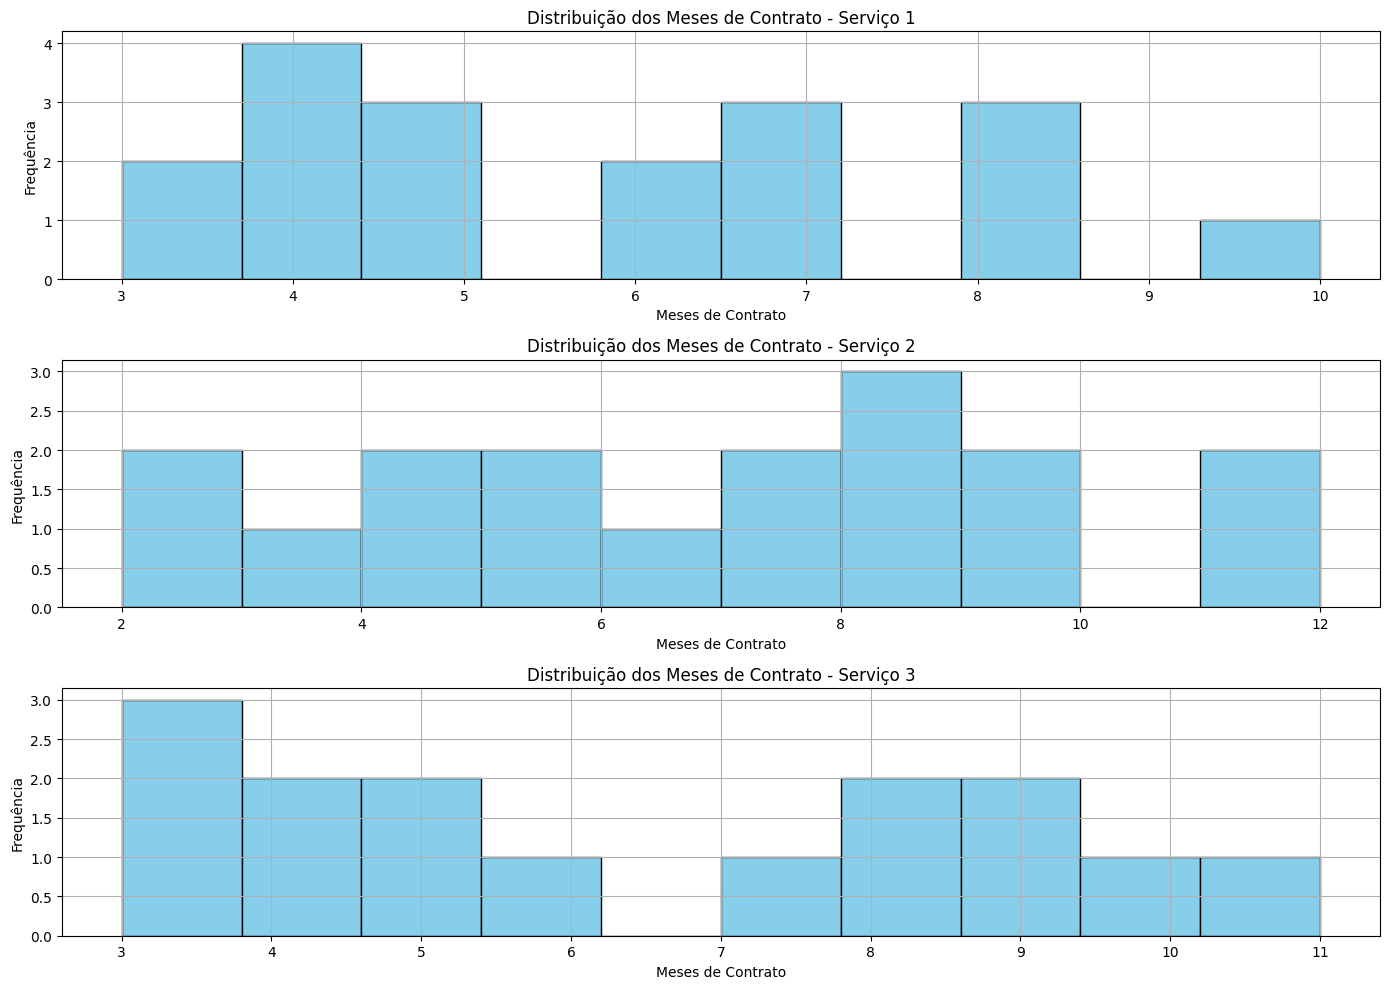

In [ ]:
# Histograma dos Meses de Contrato por Serviço
plt.figure(figsize=(14, 10))

for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.hist(ClientesEcoCompany_cleaned[ClientesEcoCompany_cleaned['Serviço'] == i]['Meses de Contrato'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição dos Meses de Contrato - Serviço {i}')
    plt.xlabel('Meses de Contrato')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.show()

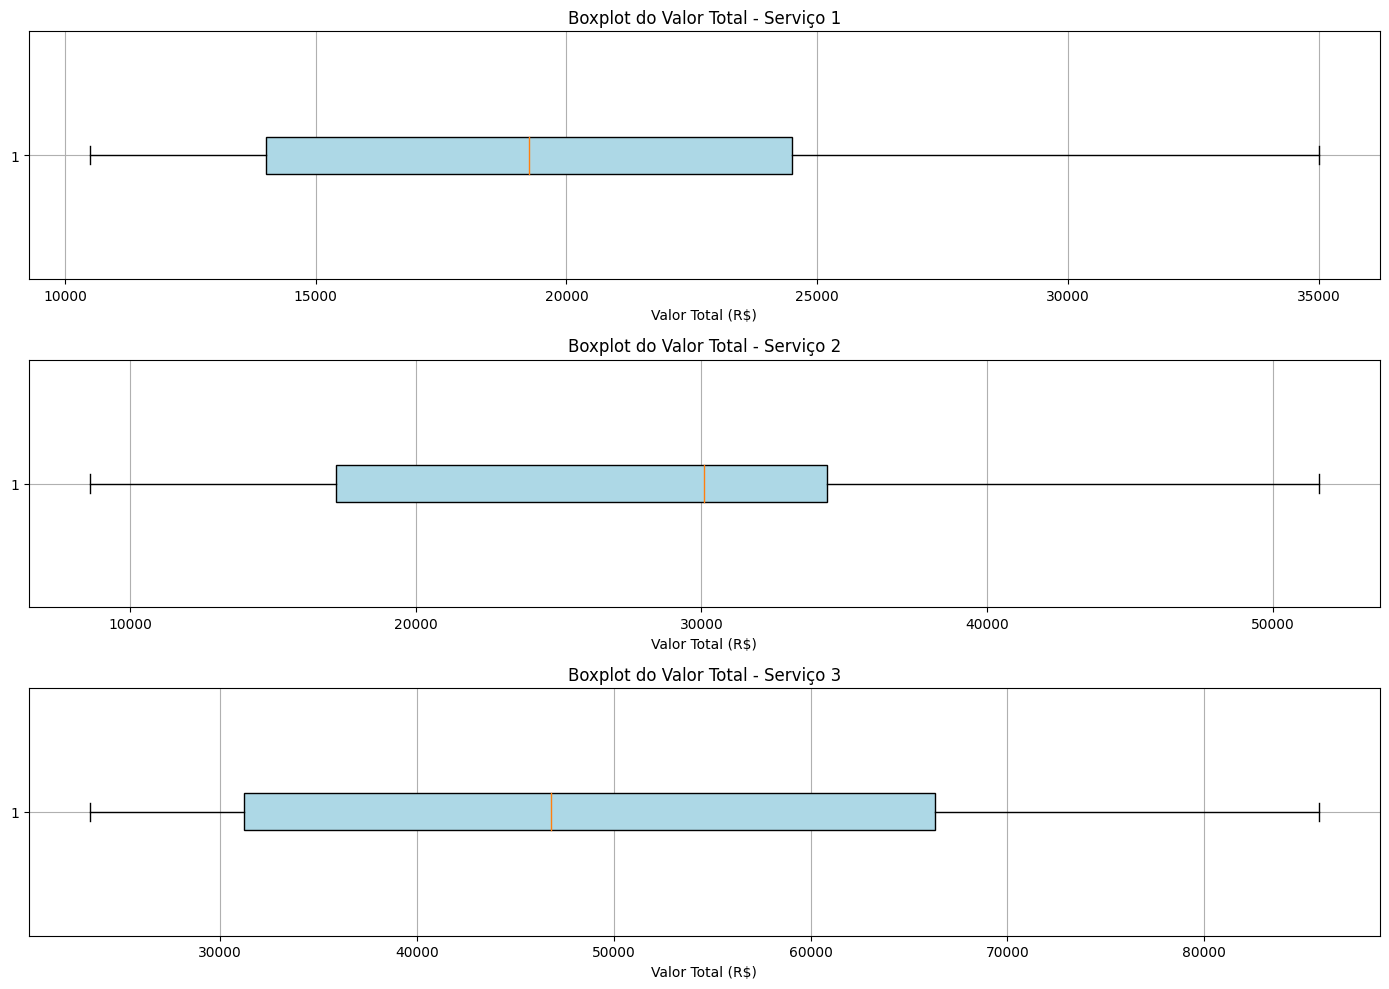

In [ ]:
# Boxplot do Valor Total por Serviço
plt.figure(figsize=(14, 10))

for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.boxplot(ClientesEcoCompany_cleaned[ClientesEcoCompany_cleaned['Serviço'] == i]['Valor Total'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot do Valor Total - Serviço {i}')
    plt.xlabel('Valor Total (R$)')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Análise Segmentada por Serviço


Análise Segmentada por Serviço
Distribuição dos Meses de Contrato:

Serviço 1: A maioria dos contratos está concentrada entre 2 e 8 meses.
Serviço 2: A distribuição é similar ao Serviço 1, com uma ligeira concentração entre 4 e 8 meses.
Serviço 3: Contratos mais espalhados, incluindo durações mais longas (até 12 meses).
Boxplot do Valor Total:

Serviço 1: Menor variação nos valores totais, com poucos outliers.
Serviço 2: Maior variação, com valores médios mais altos comparados ao Serviço 1.
Serviço 3: Maior variação e presença de outliers significativos, indicando contratos com valores muito altos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparação dos dados
X = ClientesEcoCompany_cleaned[['Meses de Contrato', 'Serviço']]
y = ClientesEcoCompany_cleaned['Valor Total']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Preparação dos dados
X = ClientesEcoCompany_cleaned[['Meses de Contrato', 'Serviço']]
y = ClientesEcoCompany_cleaned['Valor Total']


In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as formas dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [ ]:
# Exibir uma amostra dos dados
sample_data = ClientesEcoCompany_cleaned.sample(5)
sample_data

,CodCompra,CodCliente,Meses de Contrato,Valor Total,Serviço
25,26,126,5,21500.0,2
19,20,120,11,85800.0,3
8,9,109,3,10500.0,1
14,15,115,9,70200.0,3
44,45,145,8,62400.0,3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Carregar os dados
ClientesEcoCompany = pd.read_csv('ClientesEcoCompany.csv')

# Limpeza dos dados
ClientesEcoCompany = ClientesEcoCompany.iloc[:, :5]
ClientesEcoCompany['Valor Total'] = ClientesEcoCompany['Valor Total'].replace('[R$ ,]', '', regex=True).astype(float)

# Selecionar variáveis
X = ClientesEcoCompany[['Meses de Contrato', 'Serviço']]
y = ClientesEcoCompany['Valor Total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 4981.4272663601205
MSE: 43948267.891155586
R2: 0.8874790108947254


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_mae_scores = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')
rf_mse_scores = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_r2_scores = cross_val_score(rf_model, X, y, cv=10, scoring='r2')


rf_mae_scores = -rf_mae_scores
rf_mse_scores = -rf_mse_scores


print(f'Random Forest MAE Scores: {rf_mae_scores}')
print(f'Random Forest MAE Mean: {np.mean(rf_mae_scores)}')
print(f'Random Forest MSE Scores: {rf_mse_scores}')
print(f'Random Forest MSE Mean: {np.mean(rf_mse_scores)}')
print(f'Random Forest R² Scores: {rf_r2_scores}')
print(f'Random Forest R² Mean: {np.mean(rf_r2_scores)}')
from sklearn.ensemble import GradientBoostingRegressor



gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


gb_mae_scores = cross_val_score(gb_model, X, y, cv=10, scoring='neg_mean_absolute_error')
gb_mse_scores = cross_val_score(gb_model, X, y, cv=10, scoring='neg_mean_squared_error')
gb_r2_scores = cross_val_score(gb_model, X, y, cv=10, scoring='r2')


gb_mae_scores = -gb_mae_scores
gb_mse_scores = -gb_mse_scores


print(f'Gradient Boosting MAE Scores: {gb_mae_scores}')
print(f'Gradient Boosting MAE Mean: {np.mean(gb_mae_scores)}')
print(f'Gradient Boosting MSE Scores: {gb_mse_scores}')
print(f'Gradient Boosting MSE Mean: {np.mean(gb_mse_scores)}')
print(f'Gradient Boosting R² Scores: {gb_r2_scores}')
print(f'Gradient Boosting R² Mean: {np.mean(gb_r2_scores)}')

Random Forest MAE Scores: [2627.6 2275.6 1209.6 2778.6 1084.6  840.2 2839.2 2021.4 1687.6 3195.4]
Random Forest MAE Mean: 2055.98
Random Forest MSE Scores: [18142186.  14096592.8  2642598.  23535318.2  2514863.   1159741.8
 15803144.4  6695400.2  4505690.8 11902871. ]
Random Forest MSE Mean: 10099840.620000001
Random Forest R² Scores: [0.91801046 0.97896219 0.99233108 0.96855323 0.99266884 0.95888024
 0.82415629 0.96910496 0.98300699 0.91309845]
Random Forest R² Mean: 0.9498772728120748
Gradient Boosting MAE Scores: [1765.85282197 2213.73819215  107.51311867 1618.0177222   114.33503268
   98.4080346  1331.59816991  131.66396727 1518.56256815 1679.59762128]
Gradient Boosting MAE Mean: 1057.9287248877458
Gradient Boosting MSE Scores: [ 9093562.24969694 12767653.26795605    18131.93249433 12081956.50415164
    15792.67375272    14493.86994394  7748851.03698443    27420.65268282
  9561885.0645853   4906795.60013837]
Gradient Boosting MSE Mean: 5623654.285238655
Gradient Boosting R² Scores: